In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score ,accuracy_score
from sklearn.metrics import plot_roc_curve

In [2]:
#Importing data 
df = pd.read_csv(r"D:\data collection\Placement\Placement_Prediction.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


# Data dictionary

1.sl_no : Serial Number,

2.ssc_p : Secondary Education percentage- 10th Grade

3.ssc_b : Board of Education- Central/ Others

4.hsc_p : Higher Secondary Education percentage- 12th Grade

5.hsc_b : Board of Education- Central/ Others

6.hsc_s : Specialization in Higher Secondary Education

7.degree_p : Degree Percentage

8.degree_t : Under Graduation(Degree type)- Field of degree education

9.workex : Work Experience

10.etest_p : Employability test percentage ( conducted by college)

11.specialisation : Post Graduation(MBA)- Specialization

12.mba_p : MBA percentage

13.status : Status of placement- Placed/Not placed

In [3]:
df.shape

(215, 14)

In [4]:
col = []
for col1 in df.columns:
    col.append(col1)

In [5]:
col


['sl_no',
 'gender',
 'ssc_p',
 'ssc_b',
 'hsc_p',
 'hsc_b',
 'hsc_s',
 'degree_p',
 'degree_t',
 'workex',
 'etest_p',
 'specialisation',
 'mba_p',
 'status']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


## Which Department students have good chance of getting placed

In [7]:
df.groupby('degree_t')['status'].value_counts()

degree_t   status    
Comm&Mgmt  Placed        102
           Not Placed     43
Others     Not Placed      6
           Placed          5
Sci&Tech   Placed         41
           Not Placed     18
Name: status, dtype: int64

In [8]:
(102/145),(6/11),(41/59)

(0.7034482758620689, 0.5454545454545454, 0.6949152542372882)

Both Comm&Mgmt and Sci&Tech based student have 70% of getting placed  while other department have only 54% chance of getting placed

## Based on Gender who are getting good placement?

In [9]:
df.groupby('gender')['status'].value_counts()

gender  status    
F       Placed         48
        Not Placed     28
M       Placed        100
        Not Placed     39
Name: status, dtype: int64

In [10]:
df['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [11]:
100/139 , 48/76

(0.7194244604316546, 0.631578947368421)

* Male have 71% chance of getting placed 

* Female have 63% chance of getting placed

## Does WorkExperience matters in placement

In [12]:
df.groupby('workex')['status'].value_counts()

workex  status    
No      Placed        84
        Not Placed    57
Yes     Placed        64
        Not Placed    10
Name: status, dtype: int64

In [13]:
(64/74),(84/141)

(0.8648648648648649, 0.5957446808510638)

From above result we can conclude that People with WorkExperience has 86% chance of getting placed while others have 60% of getting placed

In [14]:
## Does Employability test percentage  conducted by college matters?

In [15]:

groups = df.groupby(['status', pd.cut(df.etest_p, [40,60,80, 100])])

#display bin count grouped by team
groups.size().unstack()

etest_p,"(40, 60]","(60, 80]","(80, 100]"
status,,,
Not Placed,21,34,12
Placed,38,61,49


##  Does High school percentage matters?

In [16]:
groups = df.groupby(['status', pd.cut(df.hsc_p, [10, 50, 70, 100])])

#display bin count grouped by team
groups.size().unstack()

hsc_p,"(10, 50]","(50, 70]","(70, 100]"
status,,,
Not Placed,16,45,6
Placed,0,84,64


Yes , high school mark matter we can see that student with (mark > 70) have 91% chance of getting placed and similarly people with high school percentage less 50% have no chance of getting placed

# Basic data visualization

[Text(0.5, 0, 'Work Experience among students')]

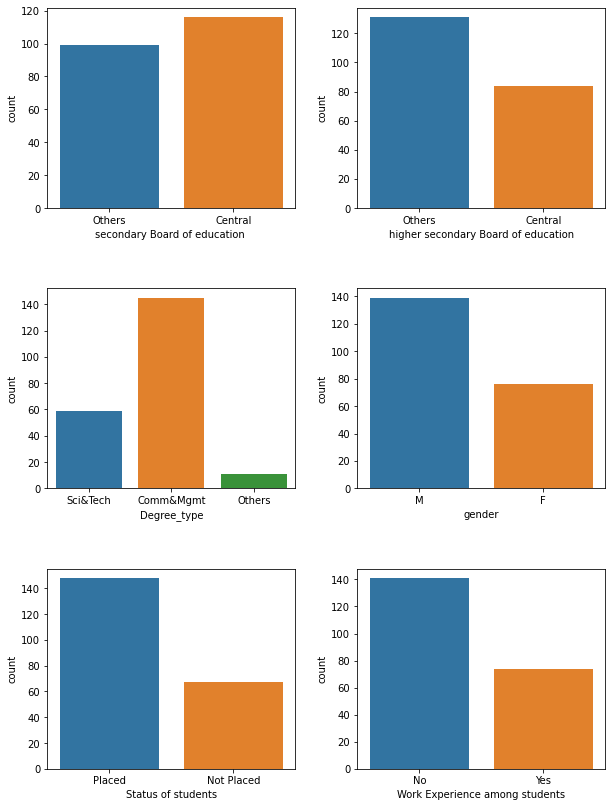

In [17]:
##Analysing Various Labels Using countplot


fig, ax = plt.subplots(3,2,figsize=(10,14)) # creating multi plot (3*2) with figure size of (10,14)
fig.subplots_adjust(hspace=0.4, wspace=0.25) #Adjusting  space between charts

sb.countplot(x='ssc_b',data=df,ax=ax[0,0])
ax[0,0].set(xlabel = "secondary Board of education ")

sb.countplot(x='hsc_b',data=df,ax=ax[0,1])
ax[0,1].set(xlabel = "higher secondary Board of education")

sb.countplot(x='degree_t',data=df,ax=ax[1,0])
ax[1,0].set(xlabel = "Degree_type")

sb.countplot(x='gender',data =df , ax= ax[1,1])

sb.countplot(x = 'status' ,data = df , ax = ax[2,0])
ax[2,0].set(xlabel = "Status of students")

sb.countplot(x = 'workex' ,data = df , ax = ax[2,1])
ax[2,1].set(xlabel = "Work Experience among students")

[Text(0.5, 0, ' % in MBA ')]

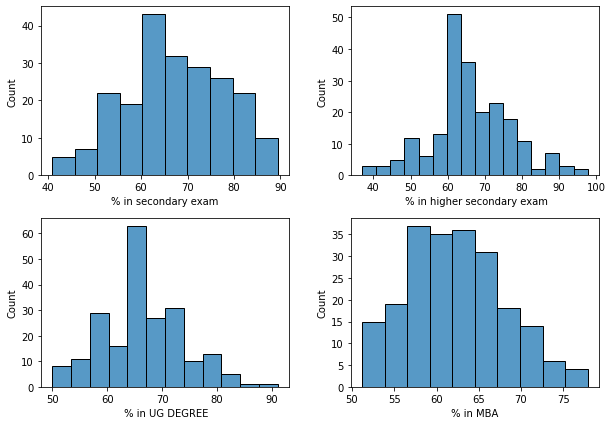

In [18]:
##ANALYSING VARIOUS DATA USING HISTPLOT


fig , ax =plt.subplots(2,2,figsize=(10,7) )
fig.subplots_adjust(hspace= 0.25, wspace = 0.25)

sb.histplot( x ='ssc_p' , data = df , ax=ax[0,0] )
ax[0,0].set(xlabel = "% in secondary exam")

sb.histplot( x = 'hsc_p', data = df , ax = ax[0,1])
ax[0,1].set(xlabel = " % in higher secondary exam")

sb.histplot( x = 'degree_p', data = df , ax = ax[1,0])
ax[1,0].set(xlabel = " % in UG DEGREE")

sb.histplot( x = 'mba_p', data = df , ax = ax[1,1])
ax[1,1].set(xlabel = " % in MBA ")

<AxesSubplot:xlabel='etest_p', ylabel='Count'>

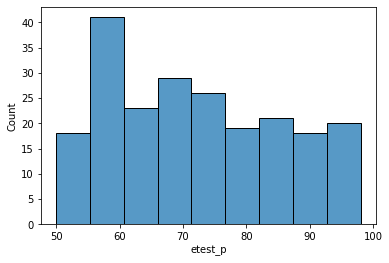

In [19]:
sb.histplot( x = 'etest_p', data = df  )


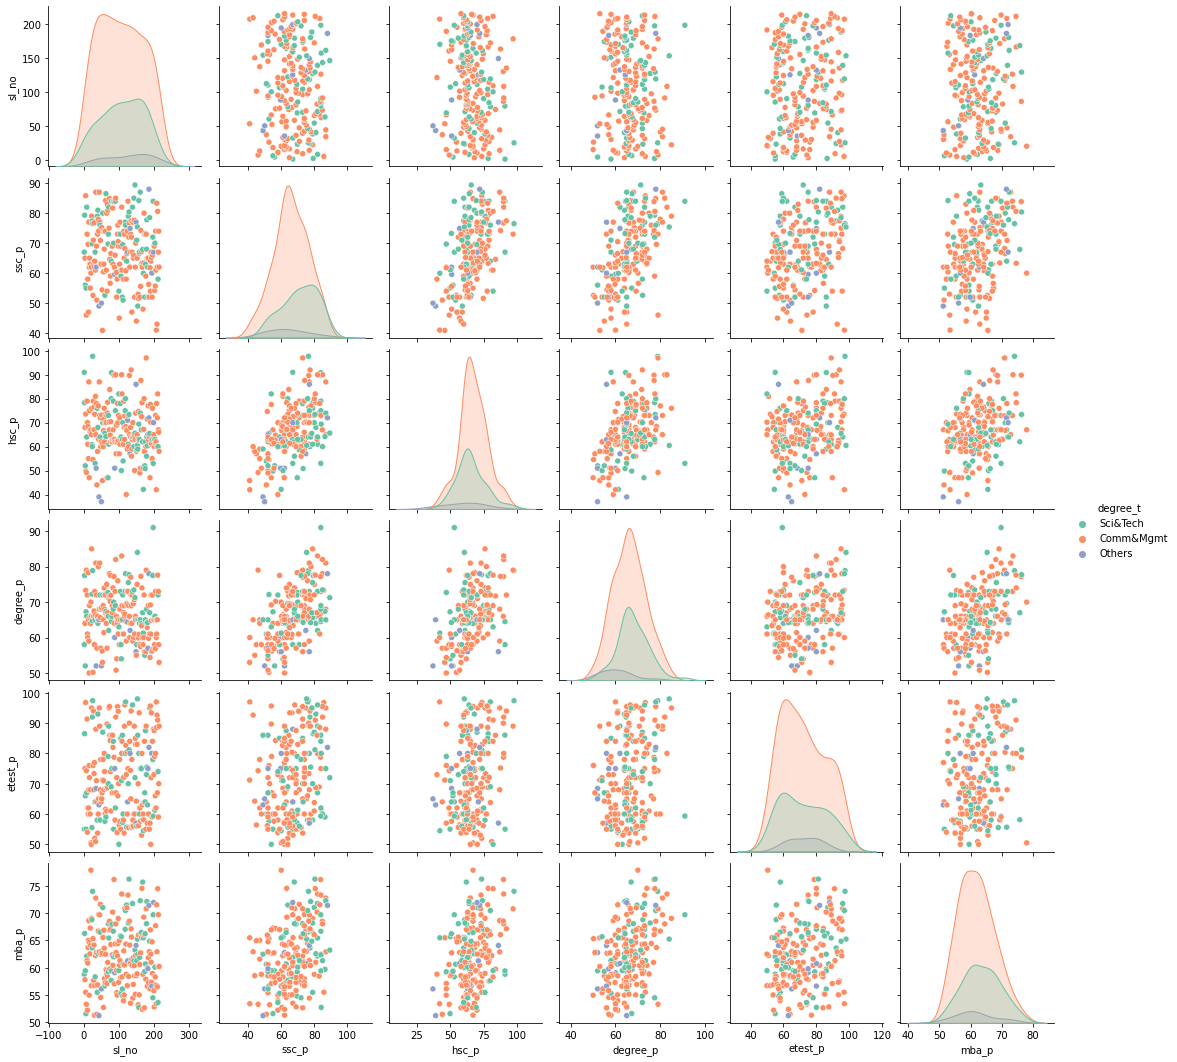

In [20]:
sb.pairplot(df , hue = 'degree_t', palette="Set2",height = 2.5)

# Correlation Map

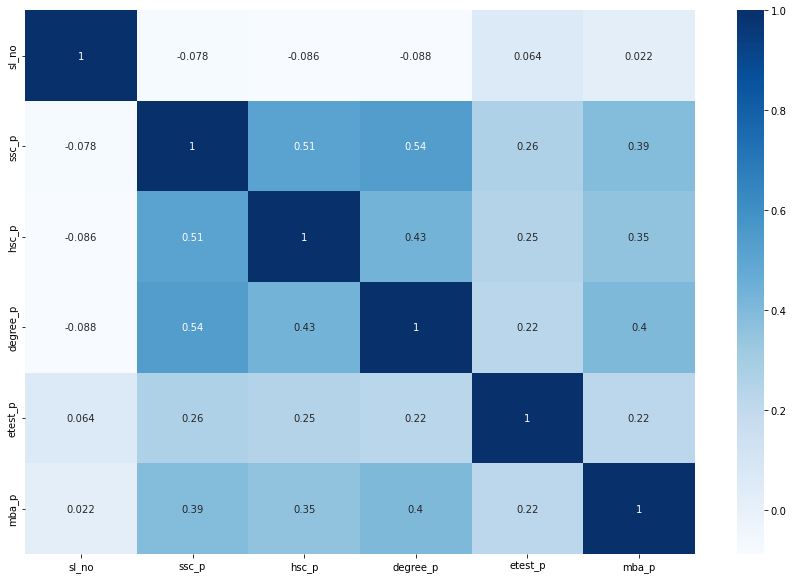

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sb.heatmap(df.corr(), annot = True, cmap = 'Blues')

## Data modelling

In [22]:
#converting 'placed'= 1 , "Not placed" = 0
df['status'] = df['status'].replace(['Placed'],1)
df['status'] = df['status'].replace(['Not Placed'],0)

In [23]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,1


In [24]:
df['gender'] = df['gender'].replace(['M'],1)
df['gender'] = df['gender'].replace(['F'],0)

In [25]:
df['hsc_b'] = df['hsc_b'].replace(['Others'],1)
df['hsc_b'] = df['hsc_b'].replace(['Central'],2)

df['ssc_b'] = df['ssc_b'].replace(['Others'],1)
df['ssc_b'] = df['ssc_b'].replace(['Central'],2)


df['workex'] = df['workex'].replace(['Yes'],1)
df['workex'] = df['workex'].replace(['No'],0)

df['hsc_s'] = df['hsc_s'].replace(['Commerce'],1)
df['hsc_s'] = df['hsc_s'].replace(['Science'],2)
df['hsc_s'] = df['hsc_s'].replace(['Arts'],3)


df['specialisation'] = df['specialisation'].replace(['Mkt&HR'],1)
df['specialisation'] = df['specialisation'].replace(['Mkt&Fin'],2)


df['degree_t'] = df['degree_t'].replace(['Comm&Mgmt'],1)
df['degree_t'] = df['degree_t'].replace(['Sci&Tech'],2)
df['degree_t'] = df['degree_t'].replace(['Others'],3)



In [26]:
#converting object into int

df1= df
df1

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,2,1,79.33,2,78.33,1,2,77.48,2,1,86.5,2,66.28,1
2,3,1,65.00,2,68.00,2,3,64.00,1,0,75.0,2,57.80,1
3,4,1,56.00,2,52.00,2,2,52.00,2,0,66.0,1,59.43,0
4,5,1,85.80,2,73.60,2,1,73.30,1,0,96.8,2,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,1,0,91.0,2,74.49,1
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,2,53.62,1
212,213,1,67.00,1,67.00,1,1,73.00,1,1,59.0,2,69.72,1
213,214,0,74.00,1,66.00,1,1,58.00,1,0,70.0,1,60.23,1


In [27]:
# Splitting data into X and y

X = df1.drop(["sl_no","status"], axis=1)
y = df1["status"]

In [28]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,2,78.33,1,2,77.48,2,1,86.5,2,66.28
2,1,65.00,2,68.00,2,3,64.00,1,0,75.0,2,57.80
3,1,56.00,2,52.00,2,2,52.00,2,0,66.0,1,59.43
4,1,85.80,2,73.60,2,1,73.30,1,0,96.8,2,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,1,0,91.0,2,74.49
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,2,53.62
212,1,67.00,1,67.00,1,1,73.00,1,1,59.0,2,69.72
213,0,74.00,1,66.00,1,1,58.00,1,0,70.0,1,60.23


In [29]:
# Split data into train and test sets

np.random.seed(50)
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25)

In [30]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(class_weight = {1:0.3, 0:0.7})}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(50)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [31]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

c:\users\dell\documents\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9074074074074074,
 'KNN': 0.8148148148148148,
 'Random Forest': 0.8703703703703703}

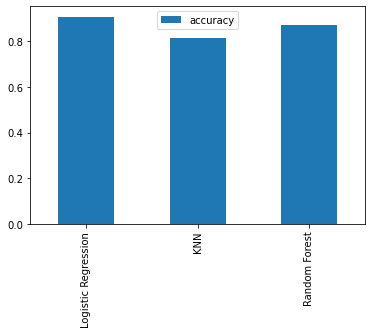

In [32]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

## Stratified K-fold Cross Validation

In [33]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model1=LogisticRegression()
scores1=cross_val_score(model1,X,y,cv=skfold)
print(np.mean(scores1))

0.855813953488372


c:\users\dell\documents\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\dell\documents\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [34]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model2=RandomForestClassifier()
scores2=cross_val_score(model2,X,y,cv=skfold)
print(np.mean(scores2))

0.8418604651162791


# Hyperparameter tuning with RandomizedSearchCV

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.3, 0:0.7}, {1:0.2, 0:0.8}]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini'],
              'class_weight':class_weight}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini'], 'class_weight': [{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.3, 0: 0.7}, {1: 0.2, 0: 0.8}]}


In [36]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'class_weight': [{0: 0.5, 1: 0.5},
                                                         {0: 0.6, 1: 0.4},
                                                         {0: 0.7, 1: 0.3},
                                                         {0: 0.8, 1: 0.2}],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                

In [37]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': {1: 0.5, 0: 0.5}}

In [38]:
best_random_grid=rf_randomcv.best_estimator_

In [39]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 8  4]
 [ 1 41]]
Accuracy Score 0.9074074074074074
Classification report:               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.94        42

    accuracy                           0.91        54
   macro avg       0.90      0.82      0.85        54
weighted avg       0.91      0.91      0.90        54



In [40]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy',
 'class_weight': {1: 0.5, 0: 0.5}}

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [10], 'max_features': ['auto'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [1800, 1900, 2000, 2100, 2200]}


In [42]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10],
                         'max_features': ['auto'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [1800, 1900, 2000, 2100, 2200]},
             verbose=2)

In [43]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=13, n_estimators=2000)

In [44]:
best_grid=grid_search.best_estimator_

In [45]:
y_pred=best_grid.predict(X_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.9074074074074074


In [46]:
print(confusion_matrix(y_test,y_pred))

[[ 8  4]
 [ 1 41]]


In [47]:
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Classification report:               precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.94        42

    accuracy                           0.91        54
   macro avg       0.90      0.82      0.85        54
weighted avg       0.91      0.91      0.90        54



c:\users\dell\documents\sample_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


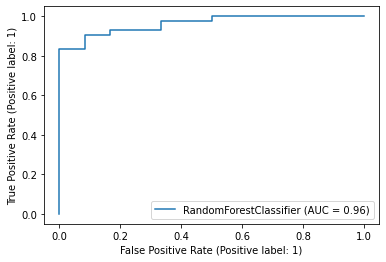

In [48]:
# Plot ROC curve and calculate and calculate AUC metric
plot_roc_curve(best_grid, X_test, y_test)

In [49]:
import pickle
filename = 'place_prediction.pkl'
pickle.dump(best_grid, open(filename, 'wb'))

In [50]:
data = np.array([[1,78.01,1,45,1,2,68.00,2,1,57.66,1,98]])

In [51]:
model = pickle.load(open('place_prediction.pkl', 'rb'))

In [52]:
 my_prediction = model.predict(data)

c:\users\dell\documents\sample_project\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [53]:
 my_prediction

array([1], dtype=int64)